In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=100, n_features=3, centers=2, random_state=101)

In [6]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
scaled_data = scaler.fit_transform(data[0])

In [10]:
data_x = scaled_data[:, 0]
data_y = scaled_data[:, 1]
data_z = scaled_data[:, 2]

In [12]:
from mpl_toolkits.mplot3d import Axes3D

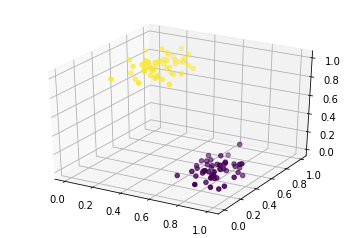

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data_x, data_y, data_z, c=data[1])

In [16]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [17]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs
learning_rate = 0.01

In [18]:
X = tf.placeholder(tf.float32, [None, num_inputs])

In [20]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

In [21]:
loss = tf.reduce_mean(tf.square(outputs - X))
optimizer = tf.train.AdagradOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [22]:
init = tf.global_variables_initializer()

In [29]:
num_steps = 2500

In [30]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train, feed_dict={X: scaled_data})
        
    output_2d = hidden.eval(feed_dict={X: scaled_data})

In [31]:
output_2d

array([[-4.07471210e-01, -4.81885970e-02],
       [-4.01387691e-01, -4.41774577e-02],
       [-8.35439622e-01,  1.23973656e+00],
       [-4.11667556e-01,  8.87037963e-02],
       [-8.01586747e-01,  1.40369105e+00],
       [-4.11461234e-01, -1.29114822e-01],
       [-4.26928788e-01, -1.23066530e-01],
       [-4.27385330e-01, -4.32911366e-02],
       [-7.49947131e-01,  1.36840117e+00],
       [-8.46207976e-01,  1.32568562e+00],
       [-7.90624440e-01,  1.21979916e+00],
       [-4.66015518e-01,  9.46954563e-02],
       [-4.01131094e-01,  1.38723344e-01],
       [-4.73078519e-01,  5.88704869e-02],
       [-4.57704306e-01,  5.57594001e-02],
       [-4.07143325e-01,  1.87349170e-01],
       [-3.38437438e-01,  1.03174746e-02],
       [-8.42837930e-01,  1.31287134e+00],
       [-3.61900449e-01,  2.32193470e-02],
       [-3.88123035e-01,  7.18451440e-02],
       [-3.90022486e-01,  9.33132023e-02],
       [-8.92336845e-01,  1.47071481e+00],
       [-4.15567189e-01,  9.42624435e-02],
       [-4.

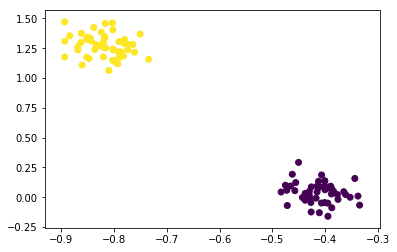

In [32]:
plt.scatter(output_2d[:, 0], output_2d[:, 1], c=data[1])